### Assignment 1 - Tariq Jamil - Batch II PGD(DS with AI)

In [146]:
### Dataset Chosen: Car price Prediction.
### data Source: https://www.kaggle.com/hellbuoy/car-price-prediction

### Task:
### To build a Price Prediction Model using tensorflow/ANN.

In [147]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [148]:
# data load from local folder (was downloaded manually in same same folder of this code file)
dfcar = pd.read_csv('CarPrice_dataset.csv')

In [149]:
dfcar.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [150]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [151]:
dfcar.describe() # descrribe shows variation amongst feature values, & need for scaling for best model performance

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [152]:
dfcar.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [153]:
# no missing values found

In [154]:
# features having categorical values:
cat_features = ['CarName','fueltype','aspiration', 'fuelsystem', 'carbody', 'drivewheel', 'enginelocation', 'enginelocation', 'enginetype', 'cylindernumber', 'doornumber']

In [155]:
# label encoding for categorical features using Label Encoder

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for f in cat_features:
    dfcar[f] = labelencoder.fit_transform(dfcar[f])
    
#data['CarName']        = labelencoder.fit_transform(data['CarName'])
#data['fueltype']       = labelencoder.fit_transform(data['fueltype'])
#data['aspiration']     = labelencoder.fit_transform(data['aspiration'])
#data['carbody']        = labelencoder.fit_transform(data['carbody'])
#data['drivewheel']     = labelencoder.fit_transform(data['drivewheel'])
#data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
#data['fuelsystem']     = labelencoder.fit_transform(data['enginelocation'])
#data['enginetype']     = labelencoder.fit_transform(data['enginetype'])
#data['cylindernumber'] = labelencoder.fit_transform(data['cylindernumber'])
#data['doornumber']     = data['doornumber'].map({'two':2.,'four':4.})   # separate encoding 

In [156]:
#cat_features = [x for x in features if x not in num_features]  # features with continuous numerical values
num_features = [x for x in features if x not in cat_features]  # features with continuous numerical values
print(num_features)
print('\n')
dfcar.info()

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    

In [157]:
dfcar = dfcar.astype('float32')
dfcar

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,88.599998,...,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,88.599998,...,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,94.500000,...,152.0,5.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,4.0,1.0,0.0,0.0,3.0,1.0,0.0,99.800003,...,109.0,5.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,5.0,1.0,0.0,0.0,3.0,0.0,0.0,99.400002,...,136.0,5.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201.0,-1.0,139.0,1.0,0.0,0.0,3.0,2.0,0.0,109.099998,...,141.0,5.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,202.0,-1.0,138.0,1.0,1.0,0.0,3.0,2.0,0.0,109.099998,...,141.0,5.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,203.0,-1.0,140.0,1.0,0.0,0.0,3.0,2.0,0.0,109.099998,...,173.0,5.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,204.0,-1.0,142.0,0.0,1.0,0.0,3.0,2.0,0.0,109.099998,...,145.0,3.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [159]:
X = (dfcar.loc[:, dfcar.columns != 'price'])
y = (dfcar.loc[:, dfcar.columns == 'price'])
print(X.shape, y.shape)

(205, 25) (205, 1)


In [162]:
# scaling numeric features
from sklearn.preprocessing import MinMaxScaler # I used Minmax scaler -- using Std/Mean method gives very abnormal resluts.

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

In [185]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train,
                    y_train,
                    validation_split = 0.2,
                    batch_size=8,
                    epochs=125,
                    verbose=0)  # verbose 0 for clean run

In [186]:
hist = history.history  # getting history dictionary from history object

In [187]:
# evaluating validation loss

import matplotlib.pyplot as plt

loss_train= hist['loss']
loss_val  = hist['val_loss']

acc_train = hist['mae']
acc_val   = hist['val_mae']

epochs = np.arange(1, len(acc_train)+1)

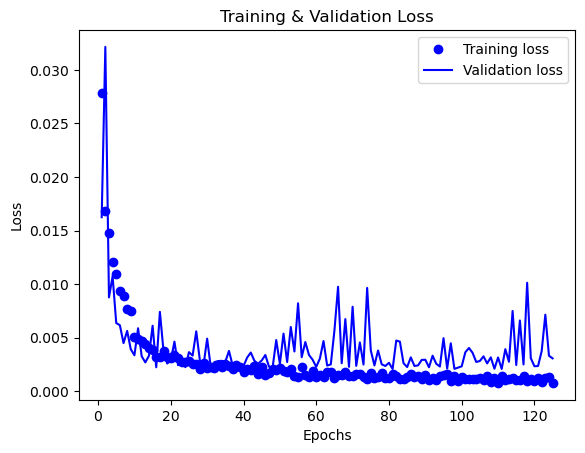

In [188]:
plt.plot(epochs, loss_train, 'bo', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

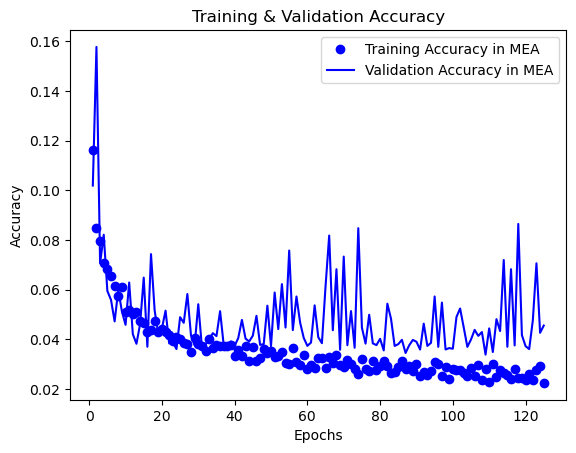

In [189]:
# evaluating validation accuracy

plt.plot(epochs, acc_train, 'bo', label='Training Accuracy in MEA')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy in MEA')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [179]:
# pridcting on test values
test_loss_score, test_accuracy_score = model.evaluate(X_test, y_test)

# display test loss
print(f'Test Loss Score={test_loss_score:2.4f}')

# display test predic 
print(f'Test Accuracy Score={test_accuracy_score:2.4f}')

2/2 [==============================] - 0s 1ms/step - loss: 0.0155 - mae: 0.0809
Test Loss Score=0.0155
Test Accuracy Score=0.0809


### There is gap of approximately <4% in training and evaluation score. I assume it is acceptable
### Of there are few epochs, then the error becomes large.